# **PRESENTATION**

Hello to everyone, my name is Francesco Aldo Venturelli and today I'm going to illustrate a simple quantum key distribution algorithm, named BB84, with a particular focus on the noise that corrupts the content of a message sent by a user.

##### **Even though comments, as you can see are, made by Laura Pasini, she's my mother and she knows nothing about programming, neither Physics. But, I'm using her latpop because mine has crashed :)**

## **How BB84 works?**

####**Alice's part**
Imagine two friends would like to communicate with a quantum device, realized by a specific quantum circuit. The sender, Alice, generates a random bit string (in our case we choose a 10 bit random bit of message) and, in the same way, a random encrypting key to encode the content of the message. In this way she realizes ten qubits and send them to Bob through a quantum circuit. Qubits can be polarized into 0,1,+ and - states.

#### **Bob's part**
Now is Bob's turn. He should generate his own random decrypting key or better, he guesses the best decrypting key (this key should be equal to the encrypting one otherwise whenever he tries to read the message, this would be impossible, or he'll get different results because the polarization is not the same and qubits are sensible to the basis you choose to measure them) in such a way to recognize as many bits as possibile. What Bob remains to do is to apply an inverse operation in order to have access to the message without corrupting it during the measurement process. In this project it's been thought that, when you have a 0 bit of message, the encoded key goes into the 0,1 state while when you have 1 bit of message your key is in the +- state, so Bob applies combination of **Hadamard and X gate**.

#### **BER**
After that, they should compare the bit they have in order to reconstruct the entire message. For every random key's bit they get correct, at least Bob has n/2 number of correct bits because he has 50% to caught the bit, they compare the message bit inside. They do this for an half bit string because they assume the error they gets is distributed in the same way through the whole message. They count also how many **message** bits they gets faild --> this proportion is the **bit error rate**. In this project also the **learned quantity of message** is plotted. 

#### **Noise**
I leave you with a question: what would it happen if there is a source of disturbance inside this process? How BER and learned message change?
...**let's see**

In [ ]:
import sys
!{sys.executable} -m pip install qiskit['visualization']

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 48.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.3/241.3 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 KB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.3/54.3 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━

In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.providers.aer import QasmSimulator, AerSimulator, Aer
from qiskit.visualization import plot_histogram
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import NoiseModel
from random import randint
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

#**Simulation of a noise quantum circuit in the BB84 protocol**

In [ ]:
def check_message_truth(true_mex):
    for i in range(0,len(true_mex)):
        if true_mex[i] == -1:
            return False
    return True

### **missed_message function takes as input Alice and Bob messages and counts how many failed bits they compared**

In [ ]:
def missed_message(Alice_message_string, Bob_message_string):

  '''
      Function that keep trace of how many wrong bits Bob has after message comparison.
      Input: Alice_message_string -> bit string Alice sends;
             Bob_message_string -> bit string Bob receives.
      Return: missed_bit/(len(Alice_message_string)) -> number of missed bits.
  '''

  missed_bit = 0
  for i in range(0, len(Alice_message_string)):
        if Alice_message_string[i] != Bob_message_string[i]:
          missed_bit += 1
  return missed_bit/len(Alice_message_string)

## BER

In [ ]:
def BER(Alice_message_string, Alice_encryption, Bob_message_string, Bob_decryption):

  '''
      Function that defines the bit error rate: portion of wrong bits inside
      the strings compared by Alice and Bob.
      Input:  Alice_message_string;
              Alice_encryption -> Alice encrypting key;
              Bob_message_string;
              Bob_decryption -> Bob decrypting key;

      Return: missed_bit/count.
  '''

  missed_bit = 0
  count=0
  for i in range(0, len(Alice_encryption)):
      if Alice_encryption[i] == Bob_decryption[i]:
          count +=1
          if Alice_message_string[i] != Bob_message_string[i]:
              missed_bit += 1
  if count == 0:
    return 0
  return missed_bit/count

In [ ]:
list_label = ['1bit mex','2bit mex','3bit mex','4bit mex','5bit mex','6bit mex','7bit mex','8bit mex','9bit mex','10bit mex']

# **NOISE SIMULATION**
For now on, the circuit used to transmit the message between Alice and Bob gets errors: bit flip, phase flip and a combination of the two with increasing probabilities.
The message length's goes from 1 unitl 10 bits - only 1 shot is considered.

### **Bit flip**

In [ ]:
def bit_flip(message_dim,prob,max_count):
    count = 0
    bit_error_rate=0
    Alice_message_string = []
    for i in range(0,message_dim):
        Alice_message_string.append(randint(0,1))

    # Initializing the message to compare
    true_mex = np.full(message_dim,-1)
    #true_mex
    while (count<max_count):
        count += 1
        Alice_encryption = []
        for i in range(0,message_dim):
            Alice_encryption.append(randint(0,1))
        circuit = QuantumCircuit(message_dim,message_dim)
        for i in range(0,message_dim):
            if (Alice_encryption[i] == 1 and Alice_message_string[i] == 1):
                circuit.x(i)
                circuit.h(i)
            elif (Alice_encryption[i] == 0 and Alice_message_string[i] == 1):
                circuit.x(i)
            elif (Alice_encryption[i] == 1 and Alice_message_string[i] == 0):
                circuit.h(i)
            #circuit_visual = circuit.draw('mpl', style='iqx') to draw the circuit
        # Bob's key generation
        Bob_decryption = []
        circuit.barrier()
        for i in range(0,message_dim):
            Bob_decryption.append(randint(0,1))
            if Bob_decryption[i] == 1:
                circuit.h(i)    
        circuit.measure_all()
       
        bit_flip =  pauli_error([('X',prob),('I',1-prob)])
        Noise_bit_flip=NoiseModel()
        Noise_bit_flip.add_all_qubit_quantum_error(bit_flip,'measure')
        backend = Aer.get_backend('aer_simulator')
        backend.set_options(noise_model = Noise_bit_flip)
        t_qc = transpile(circuit, backend=backend)
        job = backend.run(t_qc, shots=1)
        result = job.result()
        measure = result.get_counts(t_qc)

        Bob_message_array = np.empty(message_dim) # made it to handle the result of the simulation
        for key in measure.keys():
            Bob_message_dummy = key
            for i in range(message_dim):
                Bob_message_array[i] = int(Bob_message_dummy[message_dim-1-i])
        Bob_message_string = []
        for i in range(0,len(Bob_message_array)):
            Bob_message_string.append(int(Bob_message_array[i]))
        for i in range(0, len(Alice_encryption)):
            if Alice_encryption[i] == Bob_decryption[i]:
                true_mex[i] = Bob_message_string[i]
                
    return 1-missed_message(Alice_message_string,true_mex)

### **Plot**

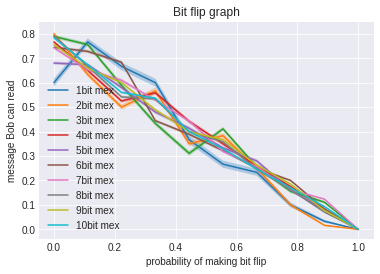

In [ ]:
p_err = np.linspace(0,1,10)
message_length = np.linspace(1,10,10)       
y = np.empty([len(message_length),len(p_err)])
y_mean = np.empty([len(message_length) ,len(p_err)])
y_std = np.empty([len(message_length) ,len(p_err)])
mean_list = np.zeros(30)


for k in range(len(message_length)):
    for j in range(len(p_err)):
        for i in range(30):
            mean_list[i] = bit_flip(int(message_length[k]),p_err[j],max_count=2)
        y[k][j] = np.mean(mean_list)
        y_std[k][j] = np.std(mean_list/len(mean_list))

for k in range(10):
    plt.plot(p_err,y[k],label=list_label[k])
    plt.fill_between(p_err,y[k]-y_std[k],y[k]+y_std[k],alpha=0.3)
plt.xlabel('probability of making bit flip')
plt.ylabel('message Bob can read')
plt.title('Bit flip graph')
plt.legend(loc=3)
plt.show()

# **Phase flip**

In [ ]:
def phase_flip_measured(message_dim,prob,max_count):
    count = 0
    bit_error_rate=0
    Alice_message_string = []
    for i in range(0,message_dim):
        Alice_message_string.append(randint(0,1))
    # Generation of Alice's message string of bits
    # Initializing the true message that will be compared later
    true_mex = np.full(message_dim,-1)
    
    while (count<max_count):
        count += 1
        Alice_encryption = []
        for i in range(0,message_dim):
            Alice_encryption.append(randint(0,1))
        circuit = QuantumCircuit(message_dim,message_dim)
        for i in range(0,message_dim):
            if (Alice_encryption[i] == 1 and Alice_message_string[i] == 1):
                circuit.x(i)
                circuit.h(i)
            elif (Alice_encryption[i] == 0 and Alice_message_string[i] == 1):
                circuit.x(i)
            elif (Alice_encryption[i] == 1 and Alice_message_string[i] == 0):
                circuit.h(i)
            # circuit_visual = circuit.draw('mpl', style='iqx') to draw the circuit
        # Bob's decryption key generation
        Bob_decryption = []
        circuit.barrier() # to separate the region where Alice acts from Bob's one
        for i in range(0,message_dim):
            Bob_decryption.append(randint(0,1))
            if Bob_decryption[i] == 1:
                circuit.h(i)    
        circuit.measure_all()
        phase_flip = pauli_error([('Z',prob),('I',1-prob)])
        Noise_bit_flip=NoiseModel()
        Noise_bit_flip.add_all_qubit_quantum_error(phase_flip,'measure') # used this istruction: does it make sense?
        backend = Aer.get_backend('aer_simulator')
        backend.set_options(noise_model = Noise_bit_flip)
        t_qc = transpile(circuit, backend=backend)
        job = backend.run(t_qc, shots=1)
        result = job.result()
        measure = result.get_counts(t_qc)

        Bob_message_array = np.empty(message_dim) # to handle the output of the circuit
        for key in measure.keys():
            Bob_message_dummy = key
            for i in range(message_dim):
                Bob_message_array[i] = int(Bob_message_dummy[message_dim-1-i])
        Bob_message_string = []
        for i in range(0,len(Bob_message_array)):
            Bob_message_string.append(int(Bob_message_array[i]))
        for i in range(0, len(Alice_encryption)):
            if Alice_encryption[i] == Bob_decryption[i]:
                true_mex[i] = Bob_message_string[i]
                
    return 1-missed_message(Alice_message_string,true_mex)

### **Plot phase flip measured**

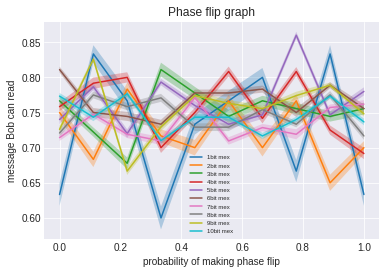

In [ ]:
p_err = np.linspace(0,1,10)  
message_length = np.linspace(1,10,10)     
y = np.empty([len(message_length),len(p_err)])
y_mean = np.empty([len(message_length) ,len(p_err)])
y_std = np.empty([len(message_length) ,len(p_err)])
mean_list = np.zeros(30)

for k in range(len(message_length)):
    for j in range(len(p_err)):
        for i in range(30):
            mean_list[i] = phase_flip_measured(int(message_length[k]),p_err[j],max_count=2)
        y[k][j] = np.mean(mean_list)
        y_std[k][j] = np.std(mean_list/len(mean_list))

for k in range(10):
    plt.plot(p_err,y[k],label=list_label[k])
    plt.fill_between(p_err,y[k]-y_std[k],y[k]+y_std[k],alpha=0.3)
plt.xlabel('probability of making phase flip')
plt.ylabel('message Bob can read')
plt.title('Phase flip graph')
plt.legend(loc='best',fontsize=6)
plt.show()

In [ ]:
def phase_flip_notmeasured(message_dim,prob,max_count):
    count = 0
    bit_error_rate=0
    Alice_message_string = []
    for i in range(0,message_dim):
        Alice_message_string.append(randint(0,1))

    true_mex = np.full(message_dim,-1)
    #true_mex
    while (count<max_count):
        count += 1
        Alice_encryption = []
        for i in range(0,message_dim):
            Alice_encryption.append(randint(0,1))
        circuit = QuantumCircuit(message_dim,message_dim)
        for i in range(0,message_dim):
            if (Alice_encryption[i] == 1 and Alice_message_string[i] == 1):
                circuit.x(i)
                circuit.h(i)
            elif (Alice_encryption[i] == 0 and Alice_message_string[i] == 1):
                circuit.x(i)
            elif (Alice_encryption[i] == 1 and Alice_message_string[i] == 0):
                circuit.h(i)
            #circuit.draw('mpl', style='iqx')
        
        Bob_decryption = []
        circuit.barrier()
        for i in range(0,message_dim):
            Bob_decryption.append(randint(0,1))
            if Bob_decryption[i] == 1:
                circuit.h(i)    
        circuit.measure_all()
        phase_flip = pauli_error([('Z',prob),('I',1-prob)])
        
        Noise_phase_flip=NoiseModel()
        Noise_phase_flip.add_all_qubit_quantum_error(phase_flip,['u1','u2','u3','u4','u5',
                                                               'u6','u7','u8','u9','u10'])
        
        backend = Aer.get_backend('aer_simulator')
        backend.set_options(noise_model = Noise_phase_flip)
        t_qc = transpile(circuit, backend=backend)
        job = backend.run(t_qc, shots=1)
        result = job.result()
        measure = result.get_counts(t_qc)

        Bob_message_array = np.empty(message_dim)
        for key in measure.keys():
            Bob_message_dummy = key
            for i in range(message_dim):
                Bob_message_array[i] = int(Bob_message_dummy[message_dim-1-i])
        Bob_message_string = []
        for i in range(0,len(Bob_message_array)):
            Bob_message_string.append(int(Bob_message_array[i]))
        for i in range(0, len(Alice_encryption)):
            if Alice_encryption[i] == Bob_decryption[i]:
                true_mex[i] = Bob_message_string[i]
                
    return 1-missed_message(Alice_message_string,true_mex)

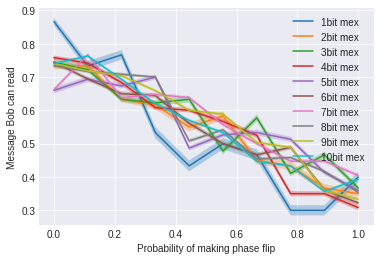

In [ ]:
p_err = np.linspace(0,1,10)
message_length = np.linspace(1,10,10)       
y = np.empty([len(message_length),len(p_err)])
y_mean = np.empty([len(message_length) ,len(p_err)])
y_std = np.empty([len(message_length) ,len(p_err)])
mean_list = np.zeros(30)


for k in range(len(message_length)):
    for j in range(len(p_err)):
        for i in range(30):
            mean_list[i] = phase_flip_notmeasured(int(message_length[k]),p_err[j],max_count=2)
        y[k][j] = np.mean(mean_list)
        y_std[k][j] = np.std(mean_list/len(mean_list))

for k in range(10):
    legend_var=(list_label[k])
    plt.plot(p_err,y[k],label=legend_var)
    plt.fill_between(p_err,y[k]-y_std[k],y[k]+y_std[k],alpha=0.3)
plt.legend(loc=1)
plt.xlabel('Probability of making phase flip')
plt.ylabel('Message Bob can read')
plt.show()

In [ ]:
def bit_and_phase_flip(message_dim,p_error,max_count):
    count = 0
    bit_error_rate=0
    Alice_message_string = []
    for i in range(0,message_dim):
        Alice_message_string.append(randint(0,1))

    true_mex = np.full(message_dim,-1)
    #true_mex
    while (count<max_count):
        count += 1
        Alice_encryption = []
        for i in range(0,message_dim):
            Alice_encryption.append(randint(0,1))
        circuit = QuantumCircuit(message_dim,message_dim)
        for i in range(0,message_dim):
            if (Alice_encryption[i] == 1 and Alice_message_string[i] == 1):
                circuit.x(i)
                circuit.h(i)
            elif (Alice_encryption[i] == 0 and Alice_message_string[i] == 1):
                circuit.x(i)
            elif (Alice_encryption[i] == 1 and Alice_message_string[i] == 0):
                circuit.h(i)
            
        Bob_decryption = []
        circuit.barrier()
        for i in range(0,message_dim):
            Bob_decryption.append(randint(0,1))
            if Bob_decryption[i] == 1:
                circuit.h(i)    
        circuit.measure_all()
        bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
        phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])
        # Combination of bit and phase flip
        bitphase_flip = bit_flip.compose(phase_flip) 
        noise_model_total = NoiseModel()
        
        error = bitphase_flip
        noise_model_total.add_all_qubit_quantum_error(error, 'measure')
        backend = Aer.get_backend('aer_simulator')
        backend.set_options(noise_model = noise_model_total)
        t_qc = transpile(circuit, backend=backend)
        job = backend.run(t_qc, shots=1)
        result = job.result()
        measure = result.get_counts(t_qc)
        Bob_message_array = np.empty(message_dim)
        for key in measure.keys():
            Bob_message_dummy = key
            for i in range(message_dim):
                Bob_message_array[i] = int(Bob_message_dummy[message_dim-1-i])
        Bob_message_string = []
        for i in range(0,len(Bob_message_array)):
            Bob_message_string.append(int(Bob_message_array[i]))
        for i in range(0, len(Alice_encryption)):
            if Alice_encryption[i] == Bob_decryption[i]:
                true_mex[i] = Bob_message_string[i]
                
    return 1-missed_message(Alice_message_string,true_mex)

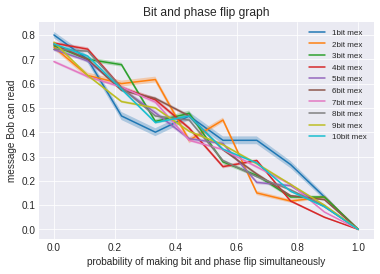

In [ ]:
p_err = np.linspace(0,1,10)  
message_length = np.linspace(1,10,10)     
y = np.empty([len(message_length),len(p_err)])
y_mean = np.empty([len(message_length) ,len(p_err)])
y_std = np.empty([len(message_length) ,len(p_err)])
mean_list = np.zeros(30)

for k in range(len(message_length)):
    for j in range(len(p_err)):
        for i in range(30):
            mean_list[i] = bit_and_phase_flip(int(message_length[k]),p_err[j],max_count=2)
        y[k][j] = np.mean(mean_list)
        y_std[k][j] = np.std(mean_list/len(mean_list))

for k in range(10):
    plt.plot(p_err,y[k],label=list_label[k])
    plt.fill_between(p_err,y[k]-y_std[k],y[k]+y_std[k],alpha=0.3)
plt.xlabel('probability of making bit and phase flip simultaneously')
plt.ylabel('message Bob can read')
plt.title('Bit and phase flip graph')
plt.legend(loc='best',fontsize=6)
plt.show()

### **Bit and phase flip together without measurement istruction on phase flip**

In [ ]:
def bit_and_phase_flip_notmeasured(message_dim,p_error,max_count):
    count = 0
    bit_error_rate=0
    Alice_message_string = []
    for i in range(0,message_dim):
        Alice_message_string.append(randint(0,1))

    true_mex = np.full(message_dim,-1)
    #true_mex
    while (count<max_count):
        count += 1
        Alice_encryption = []
        for i in range(0,message_dim):
            Alice_encryption.append(randint(0,1))
        circuit = QuantumCircuit(message_dim,message_dim)
        for i in range(0,message_dim):
            if (Alice_encryption[i] == 1 and Alice_message_string[i] == 1):
                circuit.x(i)
                circuit.h(i)
            elif (Alice_encryption[i] == 0 and Alice_message_string[i] == 1):
                circuit.x(i)
            elif (Alice_encryption[i] == 1 and Alice_message_string[i] == 0):
                circuit.h(i)
        
        Bob_decryption = []
        circuit.barrier()
        for i in range(0,message_dim):
            Bob_decryption.append(randint(0,1))
            if Bob_decryption[i] == 1:
                circuit.h(i)    
        circuit.measure_all()
        bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
        phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])
        bitphase_flip = bit_flip.compose(phase_flip) 
        noise_model_total = NoiseModel()
        
        error = bitphase_flip
        noise_model_total.add_all_qubit_quantum_error(error, ['u1','u2','u3','u4','u5','u6','u7','u8','u9','u10'])

        backend = Aer.get_backend('aer_simulator')
        backend.set_options(noise_model = noise_model_total)
        t_qc = transpile(circuit, backend=backend)
        job = backend.run(t_qc, shots=1)
        result = job.result()
        measure = result.get_counts(t_qc)
        Bob_message_array = np.empty(message_dim)
        for key in measure.keys():
            Bob_message_dummy = key
            for i in range(message_dim):
                Bob_message_array[i] = int(Bob_message_dummy[message_dim-1-i])
        Bob_message_string = []
        for i in range(0,len(Bob_message_array)):
            Bob_message_string.append(int(Bob_message_array[i]))
        for i in range(0, len(Alice_encryption)):
            if Alice_encryption[i] == Bob_decryption[i]:
                true_mex[i] = Bob_message_string[i]
                
    return 1-missed_message(Alice_message_string,true_mex)

### **Plot**

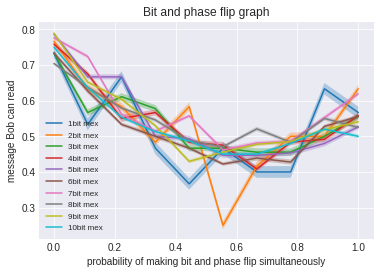

In [ ]:
p_err = np.linspace(0,1,10)  
message_length = np.linspace(1,10,10)     
y = np.empty([len(message_length),len(p_err)])
y_mean = np.empty([len(message_length) ,len(p_err)])
y_std = np.empty([len(message_length) ,len(p_err)])
mean_list = np.zeros(30)


for k in range(len(message_length)):
    for j in range(len(p_err)):
        for i in range(30):
            mean_list[i] = bit_and_phase_flip_notmeasured(int(message_length[k]),p_err[j],max_count=2)
        y[k][j] = np.mean(mean_list)
        y_std[k][j] = np.std(mean_list/len(mean_list))

for k in range(10):
    plt.plot(p_err,y[k],label=list_label[k])
    plt.fill_between(p_err,y[k]-y_std[k],y[k]+y_std[k],alpha=0.3)
plt.xlabel('probability of making bit and phase flip simultaneously')
plt.ylabel('message Bob can read')
plt.title('Bit and phase flip graph')
plt.legend(loc='best',fontsize=8)
plt.show()

### Bit error rate simulation
### **bit flip**

In [ ]:
def Ber_bit_flip(message_dim,prob,max_count):
    count = 0
    Alice_message_string = []
    for i in range(0,message_dim):
        Alice_message_string.append(randint(0,1))

    true_mex = np.full(message_dim,-1)
    #true_mex
    while (count<max_count):
        count += 1
        Alice_encryption = []
        for i in range(0,message_dim):
            Alice_encryption.append(randint(0,1))
        circuit = QuantumCircuit(message_dim,message_dim)
        for i in range(0,message_dim):
            if (Alice_encryption[i] == 1 and Alice_message_string[i] == 1):
                circuit.x(i)
                circuit.h(i)
            elif (Alice_encryption[i] == 0 and Alice_message_string[i] == 1):
                circuit.x(i)
            elif (Alice_encryption[i] == 1 and Alice_message_string[i] == 0):
                circuit.h(i)
        
        Bob_decryption = []
        circuit.barrier()
        for i in range(0,message_dim):
            Bob_decryption.append(randint(0,1))
            if Bob_decryption[i] == 1:
                circuit.h(i)    
        circuit.measure_all()
        bit_flip = pauli_error([('X',prob),('I',1-prob)])
        Noise_bit_flip=NoiseModel()
        Noise_bit_flip.add_all_qubit_quantum_error(bit_flip,'measure')
        backend = Aer.get_backend('aer_simulator')
        backend.set_options(noise_model = Noise_bit_flip)
        t_qc = transpile(circuit, backend=backend)
        job = backend.run(t_qc, shots=1)
        result = job.result()
        measure = result.get_counts(t_qc)

        Bob_message_array = np.empty(message_dim)
        for key in measure.keys():
            Bob_message_dummy = key
            for i in range(message_dim):
                Bob_message_array[i] = int(Bob_message_dummy[message_dim-1-i])
        Bob_message_string = []
        for i in range(0,len(Bob_message_array)):
            Bob_message_string.append(int(Bob_message_array[i]))
        for i in range(0, len(Alice_encryption)):
            if Alice_encryption[i] == Bob_decryption[i]:
                true_mex[i] = Bob_message_string[i]
            bit_error_rate = BER(Alice_message_string,Alice_encryption,Bob_message_string,Bob_decryption)
        
    return bit_error_rate

# **BER PLOTS**
### **Bit flip**

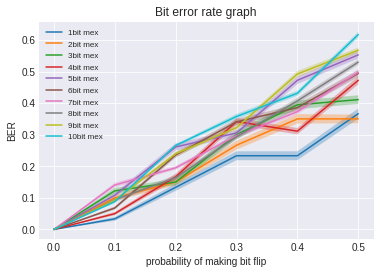

In [ ]:
p_err_bit = np.linspace(0,1,10)
message_length = np.linspace(1,10,10)
y = np.empty([len(message_length),len(p_err)])
y_mean = np.empty([len(message_length) ,len(p_err)])
y_std = np.empty([len(message_length) ,len(p_err)])
ber_list = np.zeros(30)


for k in range(len(message_length)):
    for j in range(len(p_err)):
        for i in range(30):
            ber_list[i] = Ber_bit_flip(int(message_length[k]),p_err_bit[j], max_count=2)
        y[k][j] = np.mean(ber_list)
        y_std[k][j] = np.std(ber_list/len(ber_list))

for k in range(10):
    plt.plot(p_err,y[k],label=list_label[k])
    plt.fill_between(p_err,y[k]-y_std[k],y[k]+y_std[k],alpha=0.3)
plt.xlabel('probability of making bit flip')
plt.ylabel('BER')
plt.title('Bit error rate graph')
plt.legend(loc='best',fontsize=8)
plt.show()

### **Ber with phase flip**

In [ ]:
def Ber_phase_flip(message_dim,p,max_count):
    count = 0
    Alice_message_string = []
    for i in range(0,message_dim):
        Alice_message_string.append(randint(0,1))

    true_mex = np.full(message_dim,-1)
    #true_mex
    while (count<max_count):
        count += 1
        Alice_encryption = []
        for i in range(0,message_dim):
            Alice_encryption.append(randint(0,1))
        circuit = QuantumCircuit(message_dim,message_dim)
        for i in range(0,message_dim):
            if (Alice_encryption[i] == 1 and Alice_message_string[i] == 1):
                circuit.x(i)
                circuit.h(i)
            elif (Alice_encryption[i] == 0 and Alice_message_string[i] == 1):
                circuit.x(i)
            elif (Alice_encryption[i] == 1 and Alice_message_string[i] == 0):
                circuit.h(i)

        Bob_decryption = []
        circuit.barrier()
        for i in range(0,message_dim):
            Bob_decryption.append(randint(0,1))
            if Bob_decryption[i] == 1:
                circuit.h(i)    
        circuit.measure_all()
        phase_flip = pauli_error([('Z',p),('I',1-p)])

        Noise_phase_flip=NoiseModel()
        Noise_phase_flip.add_all_qubit_quantum_error(phase_flip,['u1', 'u2', 'u3','u4','u5','u6','u7','u8','u9','u10'])

        backend = Aer.get_backend('aer_simulator')
        backend.set_options(noise_model = Noise_phase_flip)
        t_qc = transpile(circuit, backend=backend)
        job = backend.run(t_qc, shots=1)
        result = job.result()
        measure = result.get_counts(t_qc)

        Bob_message_array = np.empty(message_dim)
        for key in measure.keys():
            Bob_message_dummy = key
            for i in range(message_dim):
                Bob_message_array[i] = int(Bob_message_dummy[message_dim-1-i])
        Bob_message_string = []
        for i in range(0,len(Bob_message_array)):
            Bob_message_string.append(int(Bob_message_array[i]))
        for i in range(0, len(Alice_encryption)):
            if Alice_encryption[i] == Bob_decryption[i]:
                true_mex[i] = Bob_message_string[i]
            bit_error_rate = BER(Alice_message_string,Alice_encryption,Bob_message_string,Bob_decryption)
        
    return bit_error_rate

### **plot**

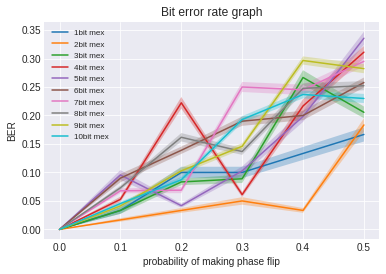

In [ ]:
message_length = np.linspace(1,10,10)
p_err_phase = np.linspace(0,1,10)
y = np.empty([len(message_length),len(p_err)])
y_mean = np.empty([len(message_length) ,len(p_err)])
y_std = np.empty([len(message_length) ,len(p_err)])
ber_list = np.zeros(30)


for k in range(len(message_length)):
    for j in range(len(p_err)):
        for i in range(30):
            ber_list[i] = Ber_phase_flip(int(message_length[k]),p_err_phase[j], max_count=2)
        y[k][j] = np.mean(ber_list)
        y_std[k][j] = np.std(ber_list/len(ber_list))

for k in range(10):
    plt.plot(p_err,y[k],label=list_label[k])
    plt.fill_between(p_err,y[k]-y_std[k],y[k]+y_std[k],alpha=0.3)
plt.xlabel('probability of making phase flip')
plt.ylabel('BER')
plt.title('Bit error rate graph')
plt.legend(loc='best',fontsize=8)
plt.show()

### **Ber with phase flip on measurement**

In [ ]:
def Ber_phase_flipmeasure(message_dim,prob,max_count):
    count = 0
    Alice_message_string = []
    for i in range(0,message_dim):
        Alice_message_string.append(randint(0,1))

    true_message = np.full(message_dim,-1)
    #true_message
    while (count<max_count):
        count += 1
        Alice_encryption = []
        for i in range(0,message_dim):
            Alice_encryption.append(randint(0,1))
        circuit = QuantumCircuit(message_dim,message_dim)
        for i in range(0,message_dim):
            if (Alice_encryption[i] == 1 and Alice_message_string[i] == 1):
                circuit.x(i)
                circuit.h(i)
            elif (Alice_encryption[i] == 0 and Alice_message_string[i] == 1):
                circuit.x(i)
            elif (Alice_encryption[i] == 1 and Alice_message_string[i] == 0):
                circuit.h(i)

        Bob_decryption = []
        circuit.barrier()
        for i in range(0,message_dim):
            Bob_decryption.append(randint(0,1))
            if Bob_decryption[i] == 1:
                circuit.h(i)    
        circuit.measure_all()
        phase_flip = pauli_error([('Z',prob),('I',1-prob)])

        Noise_phase_flip=NoiseModel()
        Noise_phase_flip.add_all_qubit_quantum_error(phase_flip,'measure') # now we add the measure instruction and see

        backend = Aer.get_backend('aer_simulator')
        backend.set_options(noise_model = Noise_phase_flip)
        t_qc = transpile(circuit, backend=backend)
        job = backend.run(t_qc, shots=1)
        result = job.result()
        measure = result.get_counts(t_qc)

        Bob_message_array = np.empty(message_dim)
        for key in measure.keys():
            Bob_message_dummy = key
            for i in range(message_dim):
                Bob_message_array[i] = int(Bob_message_dummy[message_dim-1-i])
        Bob_message_string = []
        for i in range(0,len(Bob_message_array)):
            Bob_message_string.append(int(Bob_message_array[i]))
        for i in range(0, len(Alice_encryption)):
            if Alice_encryption[i] == Bob_decryption[i]:
                true_message[i] = Bob_message_string[i]
            bit_error_rate = BER(Alice_message_string,Alice_encryption,Bob_message_string,Bob_decryption)
        
    return bit_error_rate

### **....plot**

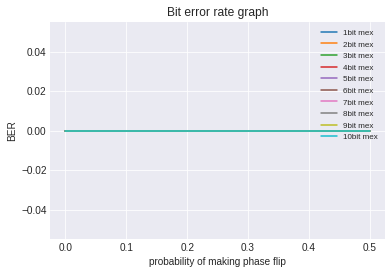

In [ ]:
message_length = np.linspace(1,10,10)
p_err_phase = np.linspace(0,1,10)
y = np.empty([len(message_length),len(p_err)])
y_mean = np.empty([len(message_length) ,len(p_err)])
y_std = np.empty([len(message_length) ,len(p_err)])
ber_list = np.zeros(30)


for k in range(len(message_length)):
    for j in range(len(p_err)):
        for i in range(30):
            ber_list[i] = Ber_phase_flipmeasure(int(message_length[k]),p_err_phase[j], max_count=2)
        y[k][j] = np.mean(ber_list)
        y_std[k][j] = np.std(ber_list/len(ber_list))

for k in range(10):
    plt.plot(p_err,y[k],label=list_label[k])
    plt.fill_between(p_err,y[k]-y_std[k],y[k]+y_std[k],alpha=0.3)
plt.xlabel('probability of making phase flip')
plt.ylabel('BER')
plt.title('Bit error rate graph')
plt.legend(loc='best',fontsize=8)
plt.show()

In [ ]:
def ber_bit_and_phase_flip_notmeasured(n_iter,p_error,max_count):
    count = 0
    bit_error_rate=0
    Alice_message_string = []
    for i in range(0,n_iter):
        Alice_message_string.append(randint(0,1))

    true_mex = np.full(n_iter,-1)
    #true_mex
    while (count<max_count):
        count += 1
        Alice_encryption = []
        for i in range(0,n_iter):
            Alice_encryption.append(randint(0,1))
        circuit = QuantumCircuit(n_iter,n_iter)
        for i in range(0,n_iter):
            if (Alice_encryption[i] == 1 and Alice_message_string[i] == 1):
                circuit.x(i)
                circuit.h(i)
            elif (Alice_encryption[i] == 0 and Alice_message_string[i] == 1):
                circuit.x(i)
            elif (Alice_encryption[i] == 1 and Alice_message_string[i] == 0):
                circuit.h(i)
            
        Bob_decryption = []
        circuit.barrier()
        for i in range(0,n_iter):
            Bob_decryption.append(randint(0,1))
            if Bob_decryption[i] == 1:
                circuit.h(i)    
        circuit.measure_all()
        bit_flip = pauli_error([('X', p_error), ('I', 1 - p_error)])
        phase_flip = pauli_error([('Z', p_error), ('I', 1 - p_error)])
        
        bitphase_flip = bit_flip.compose(phase_flip) 
        noise_model_total = NoiseModel()
        error = bitphase_flip
        noise_model_total.add_all_qubit_quantum_error(error, ['u1','u2','u3','u4','u5','u6','u7','u8','u9','u10'])
        
        backend = Aer.get_backend('aer_simulator')
        backend.set_options(noise_model = noise_model_total)
        t_qc = transpile(circuit, backend=backend)
        job = backend.run(t_qc, shots=1)
        result = job.result()
        measure = result.get_counts(t_qc)
        Bob_message_array = np.empty(n_iter)
        for key in measure.keys():
            Bob_message_dummy = key
            for i in range(n_iter):
                Bob_message_array[i] = int(Bob_message_dummy[n_iter-1-i])
        Bob_message_string = []
        for i in range(0,len(Bob_message_array)):
            Bob_message_string.append(int(Bob_message_array[i]))
        for i in range(0, len(Alice_encryption)):
            if Alice_encryption[i] == Bob_decryption[i]:
                true_mex[i] = Bob_message_string[i]
            bit_error_rate = BER(Alice_message_string,Alice_encryption,Bob_message_string,Bob_decryption)
        
    return bit_error_rate

#### **Ber with bit and phase not measured flip together plotted**

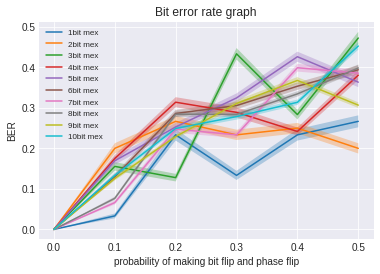

In [ ]:
message_length = np.linspace(1,10,10)
p_err_phaseflip = np.linspace(0,1,10)
y = np.empty([len(message_length),len(p_err)])
y_mean = np.empty([len(message_length) ,len(p_err)])
y_std = np.empty([len(message_length) ,len(p_err)])
ber_list = np.zeros(30)


for k in range(len(message_length)):
    for j in range(len(p_err)):
        for i in range(30):
            ber_list[i] = ber_bit_and_phase_flip_notmeasured(int(message_length[k]),p_err_phaseflip[j], max_count=2)
        y[k][j] = np.mean(ber_list)
        y_std[k][j] = np.std(ber_list/len(ber_list))

for k in range(10):
    plt.plot(p_err,y[k],label=list_label[k])
    plt.fill_between(p_err,y[k]-y_std[k],y[k]+y_std[k],alpha=0.3)
plt.xlabel('probability of making bit flip and phase flip')
plt.ylabel('BER')
plt.title('Bit error rate graph')
plt.legend(loc='best',fontsize=8)
plt.show()